In [2]:
import numpy as np 

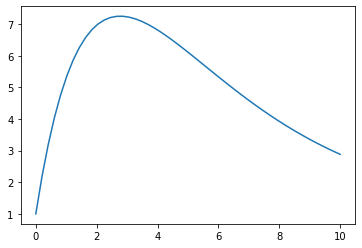

In [11]:
import matplotlib.pyplot as plt 
def f(x, D, k1, k2, scale):
    A = 1 - D*np.exp(-k1*x)
    B = D*np.exp(-k2*x)
    return A + B

x = np.linspace(0, 50)
plt.plot(x, f(x, 25, 0.5, 0.25, 0.05))